<class 'numpy.ndarray'>
(592, 500, 3)
296000
(296000, 3)


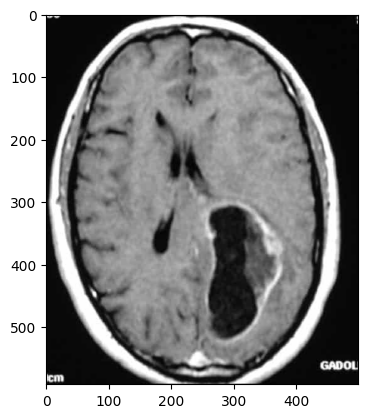

In [2]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
# import matplotlib.image as mpimg

img = imread('brain.jpg')
print(type(img))
plt.imshow(img)
print(img.shape)
print(592*500)

RGBvec = img.reshape(-1, img.shape[-1])
print(RGBvec.shape)

In [2]:
from sklearn.cluster import KMeans
import numpy as np

num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state = 0).fit(RGBvec)
KM_labels = kmeans.labels_

In [3]:
rowcolor = np.diagflat(np.full(num_clusters,255))
cols = np.array(rowcolor[KM_labels])

(296000, 3)
(592, 500, 3)


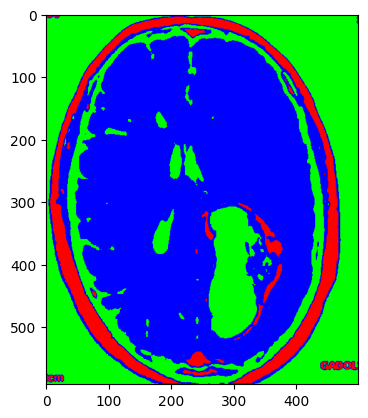

In [4]:
print(cols.shape)
coloredimg = cols.reshape((-1, 500) + (3,))
print(coloredimg.shape)
plt.imshow(coloredimg)

In [5]:
from sklearn.cluster import MeanShift, estimate_bandwidth
import numpy as np

bandwidth = estimate_bandwidth(RGBvec, quantile=0.5, n_samples=9000)
bandwidth

clustering = MeanShift(bandwidth=bandwidth, n_jobs = -1, bin_seeding=True, cluster_all=False).fit(RGBvec)

MS_labels = clustering.labels_
print(MS_labels)
n_clusters_ = len(np.unique(MS_labels))
n_clusters_

[1 1 0 ... 1 1 1]


3

In [29]:
MS_rowcolor = np.random.randint(255, size=(RGBvec.shape[0],3))
print(MS_rowcolor.shape)
MS_cols = np.array(MS_rowcolor[MS_labels])
MS_cols.shape

(296000, 3)


(100, 3)

(592, 500, 3)


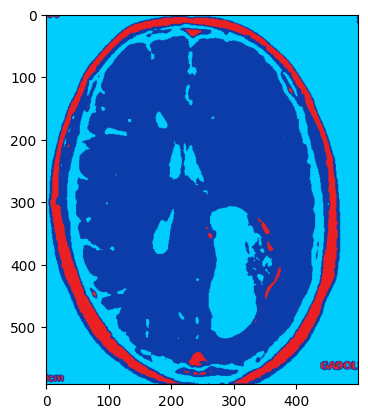

In [7]:
MS_coloredimg = MS_cols.reshape((-1, 500) + (3,))
print(MS_coloredimg.shape)
plt.imshow(MS_coloredimg)

In [34]:
RGBvec.shape

(296000, 3)

In [26]:
from sklearn.cluster import DBSCAN
import numpy as np
clustering = DBSCAN(eps=1,min_samples=20,algorithm='brute', metric='manhattan').fit(RGBvec)
# clustering.labels_
DB_labels = clustering.labels_
# print(DB_labels)
n_clusters_ = len(np.unique(DB_labels))
n_clusters_

KeyboardInterrupt: 

In [28]:
clustering.labels_
DB_labels = clustering.labels_
# print(DB_labels)
n_clusters_ = len(np.unique(DB_labels))
n_clusters_

256

In [29]:
DB_rowcolor = np.random.randint(255, size=(RGBvec.shape[0],3))
print(DB_rowcolor.shape)
DB_cols = np.array(DB_rowcolor[DB_labels])
DB_cols.shape

(296000, 3)


(296000, 3)

(592, 500, 3)


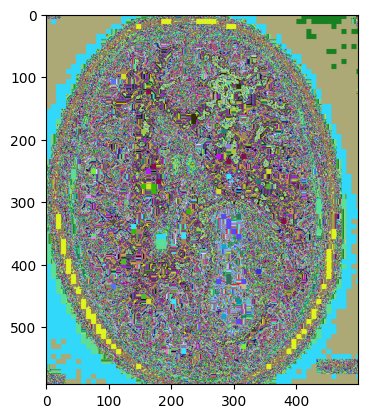

In [30]:
DB_coloredimg = DB_cols.reshape((-1, 500) + (3,))
print(DB_coloredimg.shape)
plt.imshow(DB_coloredimg)